# D11：EDA: 不同數值範圍間的特徵如何檢視/繪圖與樣式Kernel Density Estimation (KDE)


## [EDA] 了解變數分布狀態: Bar & KDE (density plot)

## [教學目標]

以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形

分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受

順便熟悉 matplotlib 的幾種繪圖設定

## [範例重點]

各種樣式的長條圖(Bar) (In[4], Out[4])

不同的 KDE 曲線與繪圖設定 (In[5], Out[5]) 以及切換不同 Kernel function 的效果 (In[6], Out[6])

--------

> 

## KDE 的優點與缺點

• 優：無⺟數⽅法，對分布沒有假設 (使⽤上不需擔⼼是否有⼀些常⾒的特定假設，如分布為常態)

• 缺：計算量⼤，電腦不好可能跑不動

## 透過 KDE plot，我們可以較為清楚的看到不同組間的分布差異

> 

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
import seaborn as sns
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

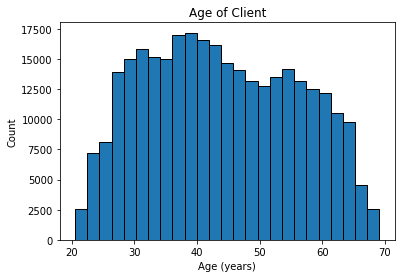

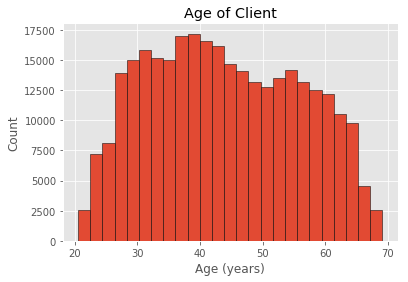

In [4]:
# 以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

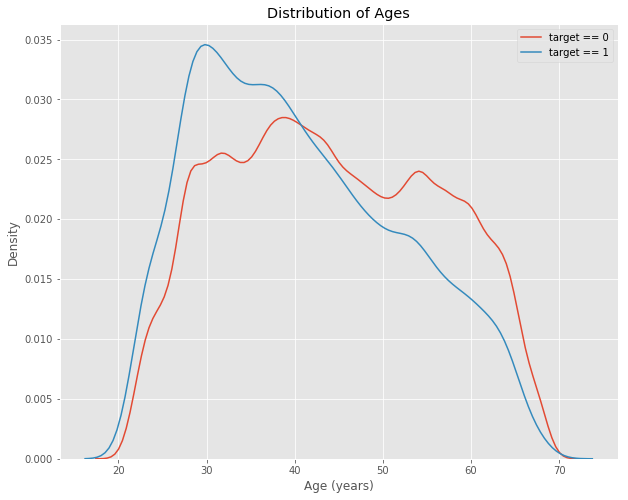

In [5]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()

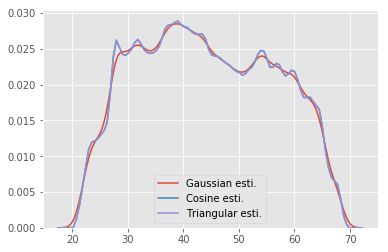

In [6]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

## 補充說明:

1. [KDE](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py)
2. [什麼是 KDE](https://blog.csdn.net/unixtch/article/details/78556499)

## 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現

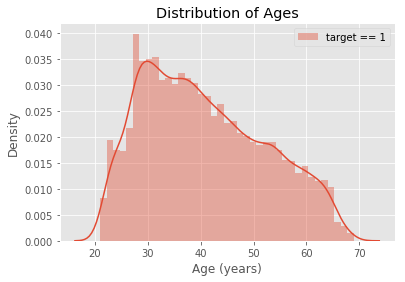

In [7]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

## [作業目標]

試著調整資料, 並利用提供的程式繪製分布圖

## [作業重點]

如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),

送入繪圖前的除了排序外, 還要注意什麼? (In[5])

如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

## 除了直接觀察變項以外，我們也可以分群比較

自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)

以年齡區間為 x, target 為 y 繪製 barplot

In [8]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [9]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = list(np.arange(20, 75, 5)) # np.arange(20, 70, 5)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25, 30]"
1,0,16765,45.931507,"(45, 50]"
2,0,19046,52.180822,"(50, 55]"
3,0,19005,52.068493,"(50, 55]"
4,0,19932,54.608219,"(50, 55]"


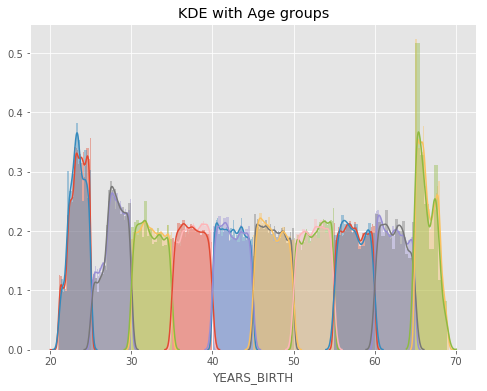

In [10]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = list(age_data['YEARS_BINNED'].value_counts().sort_index().index)

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

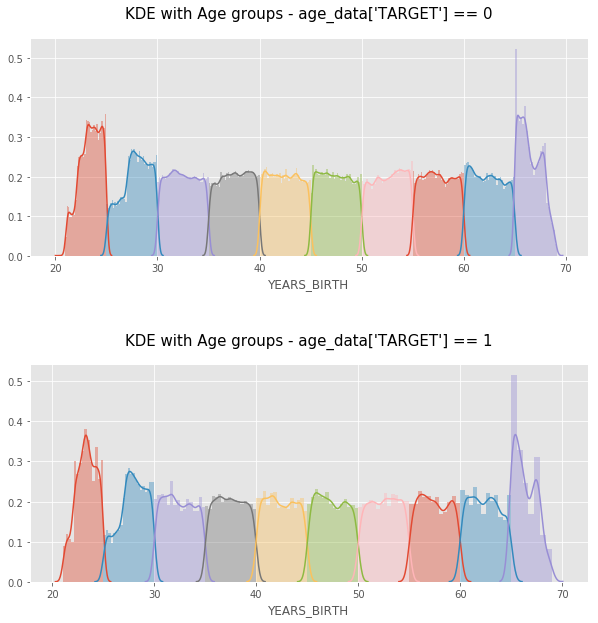

In [11]:
year_group_sorted = list(age_data['YEARS_BINNED'].value_counts().sort_index().index)

fig, (ax) = plt.subplots(2,1, figsize = (10, 10))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]), ax = ax[0])
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]), ax = ax[1])


ax[0].set_title("KDE with Age groups - age_data['TARGET'] == 0", size = 15, pad = 20)
ax[1].set_title("KDE with Age groups - age_data['TARGET'] == 1", size = 15, pad = 20)

plt.subplots_adjust(wspace = 0.25, hspace = 0.5)

plt.show()

In [12]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20, 25]",0.123036,8532.795625,23.377522
"(25, 30]",0.111436,10155.219250,27.822518
"(30, 35]",0.102814,11854.848377,32.479037
"(35, 40]",0.089414,13707.908253,37.555913
"(40, 45]",0.078491,15497.661233,42.459346
"(45, 50]",0.074171,17323.900441,47.462741
"(50, 55]",0.066968,19196.494791,52.593136
"(55, 60]",0.055314,20984.262742,57.491131
"(60, 65]",0.052737,22780.547460,62.412459


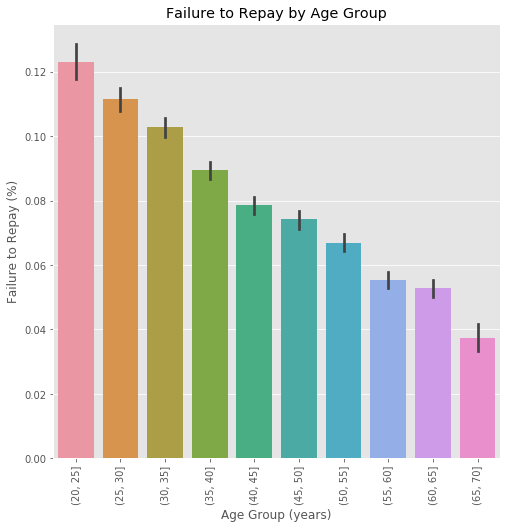

In [13]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data["YEARS_BINNED"]
py = age_data["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## 參考資料

## 課後補充:

繪圖靈感資源參考

1. [Python Graph Gallery (圖表參考)](https://python-graph-gallery.com/)

這裡整合了 Python 許多繪圖函數的寫法, 同學可以依據自己的喜好與資料形式, 挑選適合的圖形寫作, 並不需要全部看懂, 只需要當成查詢用的工具手冊即可 
![image](https://lh4.googleusercontent.com/6bp-ZIIW2BnjIvHxENWktbAQVUs5Vldv37A8pCKEFSqXbatb8u2ocyeZXXlh1yKo56O-sCgCbEvtzZP3KCbMLhv7NI_d0vq8jJJl-tZxzxiIbcoAFa-fQn7JZ0U30gtwMCUv8qupqi8?t=1556183661745)

2. [R Graph Gallery](https://www.r-graph-gallery.com/)

這裡整合了 R 許多繪圖函數的寫法, 與上面的網站是相關網站, 如果較擅長使用 R 做資料科學, 可以先從這邊參考
![image](https://lh5.googleusercontent.com/yXSuTDGbDCdkaC0OiyNz9eEZ7c0uF4scBzUsg3myJXxsLYeEdc0EYay_18mG7v9z7wXi_jgqQAj3o6TBfnOFDvcf0m0sYgBfwtR5MeBJYErhQnbONE7a7dPBcz87l8lKMBAvKcHAlbg?t=1556183773352)

3. [R Graph Gallery (Interactive plot, 互動圖)](https://bl.ocks.org/mbostock)

可以由 R 語言繪製出的互動圖表, 也是提供同學查詢之用

![image](https://lh4.googleusercontent.com/w-K1QaK_b2_njamHqYD5iLaSIWL_a_L_6Qx87CpiJ9suLh5lMpGPOuB1q-muEGJLXnMANcL4AuF9AcVR9QOGd0AjS69u5ZcXVAIxhDhXEdpyovpZFvjOZ-79WmWN9BmRFd_Gm9qDX9E?t=1556184006526)


4. [D3.js](https://d3js.org/)
D3.js 是知名的 JavaSrcipt 網頁繪圖套件, 如果您是前端工程師, 熟練D3.js 將可使您的網頁圖表豐富起來
![image](https://lh5.googleusercontent.com/Q9Ants4GzrqqzI9BUSPvVC07jHBxbfx-NCLfrpgHc4KC4CF-HwoUm4TMISQyThHzlI9gXD4GHI3A0zFk0VdxLw9rPEUPEKhYXffKmV8dH7vfvxUfJZVfEo6gZoRQsY7ND7lNH0TC37s?t=1556184102503)

## 補充資料

- [核密度估計基礎 - 1](https://blog.csdn.net/david830_wu/article/details/66974189)


- [核密度估計基礎 - 2](https://blog.csdn.net/unixtch/article/details/78556499)

  - 如果您是對核密度估計函數 ( Kernel Density Estimation, KDE )  理論有更多的求知慾, 歡迎來到上述兩個網站, 裡面詳盡的解說可提供您查閱


- [Seaborn 套件如果發生DLL load failed錯誤的解決辦法](https://stackoverflow.com/questions/31596125/python-dll-load-failed)


使用 Seaborn 時, 萬一出現問題 DLL load failed 怎麼辦? 這段討論提供您解決之道